In [1]:
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
from sklearn.cluster import DBSCAN
import utils
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# data = utils.load_csv_data("datasets/letter.csv") 
# df = utils.categorial_handle(data, 2)
# # df = pd.DataFrame(data)
# true_class = df.iloc[:, -1]
# df = df.drop(df.columns[-1], axis=1)

In [18]:
data = utils.load_csv_data("datasets/letter.csv") 
# data = utils.load_data_arff('datasets/mushroom_arff.arff')
df = utils.categorial_handle(data, 2)
# eps = 2.5
# minpts = 4
eps = 0.5
minpts = 80
# df = pd.DataFrame(data)
# df = pd.DataFrame(df)
true_class = df.iloc[:, -1]
df = df.drop(df.columns[-1], axis=1)

scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))

# df_numeric._get_numeric_data()
# df_numeric.head()


Categorial to ordinal Done


In [16]:
df._get_numeric_data()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.057698,-0.918603,-0.556881,-1.049137,-0.687476,0.050543,0.214833,-0.973591,1.605094,1.092242,0.207525,-0.446513,-0.877220,-0.219082,0.509640,-1.113619
1,-0.012309,-0.010743,-0.060486,-0.164704,0.682135,-0.936631,0.644886,0.507945,-0.495072,-0.113345,0.207525,0.514764,-0.448492,0.427463,1.288757,1.359441
2,1.555774,0.897117,1.428701,0.719730,0.225598,0.544130,0.214833,0.137561,2.025128,1.092242,-1.692890,0.034125,-0.448492,-2.158715,0.509640,1.359441
3,-0.012309,0.594497,-0.060486,0.719730,0.225598,0.050543,-0.215220,3.100633,-1.755172,-0.515208,-0.172558,0.034125,-0.019764,-0.219082,-1.438153,0.122911
4,1.033079,-0.010743,1.428701,-0.164704,0.225598,0.050543,-0.645273,-0.603207,0.765028,0.690380,0.207525,0.514764,-0.019764,-0.219082,-0.269477,-0.495354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.510385,0.897117,-0.060486,1.161947,-0.230939,-1.430218,1.074939,0.878329,1.185061,1.494105,1.347774,0.514764,-0.448492,0.427463,-0.659036,-1.113619
19996,-0.012309,-0.010743,0.435910,-0.164704,-0.230939,0.050543,0.214833,-0.973591,2.025128,1.494105,-0.172558,0.034125,-0.877220,0.427463,0.899198,0.122911
19997,-0.012309,0.291877,-0.556881,0.277513,0.225598,0.050543,0.214833,0.878329,-0.495072,0.690380,0.207525,-0.927151,-0.019764,0.427463,-0.269477,-0.495354
19998,-0.012309,1.199738,-0.556881,1.161947,-0.230939,-3.404567,-2.365484,-0.232823,0.344994,-2.926384,-2.453056,-0.446513,-1.305948,-0.219082,-1.438153,0.122911


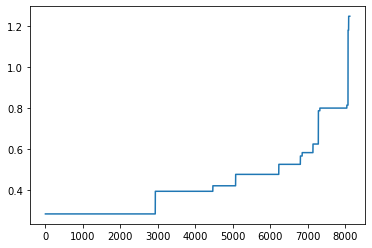

In [13]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [19]:
# eps = 3.1
ARI = []
epsilons = np.arange(0.01, 1, 0.01).tolist()
# for eps in epsilons:
clustring = DBSCAN(eps=eps, min_samples=minpts).fit(np.asarray(df))
predictions = clustring.labels_
ARI.append(adjusted_rand_score(data["class"], predictions))
    
fig = plt.figure()
# ax = plt.axes()
# ax.plot(epsilons, ARI);
print(predictions[0:100])
data["class"][0:10]


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


0    25
1    15
2    18
3     7
4     7
5     5
6    13
7    17
8    12
9     3
Name: class, dtype: int32

<Figure size 432x288 with 0 Axes>

In [ ]:
print(eps)
print(minpts)

In [64]:
print(adjusted_rand_score(data["class"], predictions))
print(predictions[0:100])
data["class"][0:10]

0.0002075892070880854
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


0    25
1    15
2    18
3     7
4     7
5     5
6    13
7    17
8    12
9     3
Name: class, dtype: int32